In [1]:
from CNN import simple_Conv2d, Max_Pool2d, ReLU
from utils import *
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns

#use pastel seaborn pallete
sns.set_palette("pastel")


In [2]:
Xtrain, Xtest, ytrain, ytest = Ising.load_data()

# Showing the affects of the filters parameters

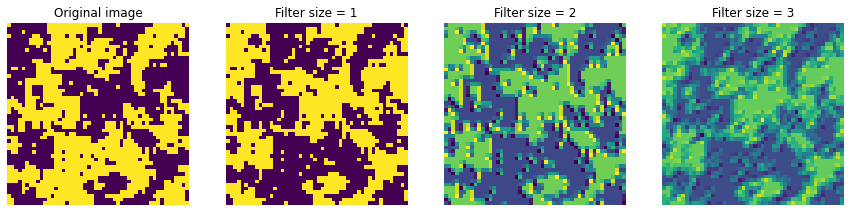

In [3]:
#plot before and after convolution for multiple filter sizes 
# make the fisrt subplot be the image

plt.subplot(1, 4, 1)
# make plot bigger
plt.axis("off")

plt.imshow(Xtrain[0].reshape(50,50))
plt.title("Original image")
for i in range(1, 4):
    conv = simple_Conv2d(1, i)
    out = conv.forward_prop(Xtrain[0].reshape(50,50))
    plt.subplot(1, 4, i + 1)
    
    plt.imshow(out[:,:,0])
    plt.title("Filter size = " + str(i))
    # turn off the axis
    plt.axis("off")

# make the plot bigger
plt.gcf().set_size_inches(15, 15)



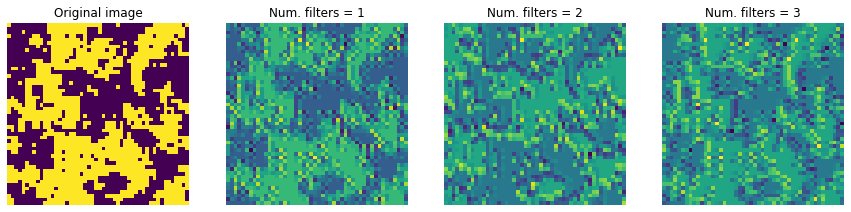

In [4]:
plt.subplot(1, 4, 1)
# make plot bigger
plt.axis("off")

plt.imshow(Xtrain[0].reshape(50,50))
plt.title("Original image")
for i in range(1, 4):
    conv = simple_Conv2d(i, 3)
    out = conv.forward_prop(Xtrain[0].reshape(50,50))
    plt.subplot(1, 4, i+1)
    plt.imshow(out[:,:,0])
    plt.title("Num. filters = " + str(i))
    plt.axis("off")

# make the plot bigger
plt.gcf().set_size_inches(15, 15)


# Showing the maxpooling in action

In [5]:
conv = simple_Conv2d(1, 3)
out = conv.forward_prop(Xtrain[0].reshape(50,50))

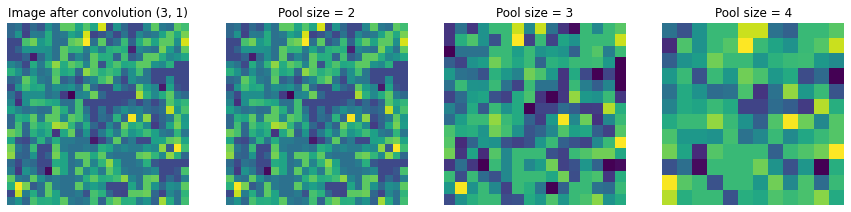

In [6]:
plt.subplot(1, 4, 1)
# make plot bigger
plt.axis("off")

plt.imshow(Xtrain[0].reshape(50,50))
plt.title("Image after convolution (3, 1)")


pool = Max_Pool2d(2)
out2 = pool.forward_prop(out)
plt.imshow(out2[:,:,0])

for i in range(1, 4):
    plt.subplot(1, 4, i + 1)

    pool = Max_Pool2d(i+1)
    out2 = pool.forward_prop(out)
    plt.imshow(out2[:,:,0])
    plt.title("Pool size = " + str(i+1))
    # turn off the axis
    plt.axis("off")
plt.gcf().set_size_inches(15, 15)


### Notice the edges are somewhat preserved while preserving a lot of the computational req!!!

# ReLu in Action

In [7]:
conv = simple_Conv2d(1, 2)
out = conv.forward_prop(Xtrain[0].reshape(50,50))

out.shape

(49, 49, 1)

# Main

In [8]:
conv1 = simple_Conv2d(2, 4)
pool1 = Max_Pool2d(2)
relu1 = ReLU(23*23*2, 10)
relu2 = ReLU(10, 1)

def cnn_forward_prop(grid, label):
    out_p = conv1.forward_prop(grid)
    out_p = pool1.forward_prop(out_p)
    out_p = relu1.forward_prop(out_p)
    out_p = relu2.forward_prop(out_p)

    # calculate the loss as mean squared error
    loss = np.mean((out_p - label)**2)
    return out_p, loss


def training_cnn(grid, label, lr=0.001):

    # forward propagation
    out, loss = cnn_forward_prop(grid, label)
    # initial gradient
    grad = 2 * (out - label)

    # backpropagation
    grad = relu2.back_prop(grad, lr)
    grad = relu1.back_prop(grad, lr)
    grad = pool1.back_prop(grad)
    grad = conv1.back_prop(grad, lr)

    return loss

In [9]:
Xtrain, Xtest, ytrain, ytest = Ising.load_data()

for epoch in range(10):
    
    print("Epoch ----> ", epoch)

    cumul_loss = 0
    for i, (grid, label) in enumerate(zip(Xtrain, ytrain)):
        # here it is best we unravel the grid
        grid = grid.reshape(50, 50)
        cumul_loss += training_cnn(grid, label)

Epoch ---->  0
dy_dz [1.]
reLU_derivative [1.]
[ True]
dy_dz [1. 1. 0. 1. 0. 0. 1. 1. 1. 0.]
reLU_derivative [1. 1. 0. 1. 0. 0. 1. 1. 1. 0.]
[ True  True  True  True  True  True  True  True  True  True]
dy_dz [1.]
reLU_derivative [1.]
[ True]
dy_dz [0. 1. 1. 1. 0. 0. 1. 0. 1. 0.]
reLU_derivative [0. 1. 1. 1. 0. 0. 1. 0. 1. 0.]
[ True  True  True  True  True  True  True  True  True  True]
dy_dz [1.]
reLU_derivative [1.]
[ True]
dy_dz [0. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
reLU_derivative [0. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
[ True  True  True  True  True  True  True  True  True  True]
dy_dz [1.]
reLU_derivative [1.]
[ True]
dy_dz [0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
reLU_derivative [0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
[ True  True  True  True  True  True  True  True  True  True]
dy_dz [1.]
reLU_derivative [1.]
[ True]
dy_dz [0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
reLU_derivative [0. 0. 1. 1. 0. 0. 1. 0. 1. 0.]
[ True  True  True  True  True  True  True  True  True  True]
dy_dz [1.]
reLU_derivative [1.]
[ True]
dy_dz

KeyboardInterrupt: 

rmse with myConv =  0.998516359150314
rmse over average of ytest with myConv=  0.45249715894074666


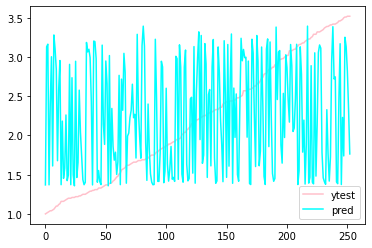

In [28]:
# now we test the model
test_loss = 0

pred = np.array([])

for i, (grid, label) in enumerate(zip(Xtest, ytest)):
    # here it is best we unravel the grid
    grid = grid.reshape(50, 50)
    out_p, loss = cnn_forward_prop(grid, label)
    test_loss += loss

    pred = np.append(pred, out_p)


# plot the results
order = np.argsort(ytest.ravel())
ytest = ytest[order]
pred = pred[order]
#plot test in pink and pred in green
plt.plot(ytest, label="ytest", color="pink")
plt.plot(pred, label="pred", color="cyan")
plt.legend()

rmse = np.sqrt(mean_squared_error(pred, ytest.ravel()))
print("rmse with myConv = ", rmse)
# rmse over average of ytest
rmse = np.sqrt(mean_squared_error(pred, ytest.ravel()))/np.mean(ytest)
print("rmse over average of ytest with myConv= ", rmse)